<a href="https://colab.research.google.com/github/apple-pie-h/Flower-Recognization-using-DeepLearning/blob/main/flower_recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Flower Recognization using Deep Learning and Pytorch

Table of Contents:
1. Importing dataset<br>
  1.1 Importing dataset from kaggle<br>
  1.2 Importing dataset into pytorch
2. Splitting data into training and validation set
3. Utility Functions and Classes
4. Model and Training Utilities
5. Model Definition
6. Training
7. Checking Accuracy and Loss<br>
  7.1 Testing with individual images


##1. Importing dataset

### 1.1 Importing dataset from kaggle





In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/alxmamaev/flowers-recognition'

In [ ]:
import os
import shutil

if os.path.exists('./flowers-recognition'):
    shutil.rmtree('./flowers-recognition')

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rv
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition


100%|██████████| 225M/225M [00:00<00:00, 674MB/s]


In [ ]:
data_dir = './flowers-recognition/flowers'

In [ ]:
import os

In [ ]:
os.listdir(data_dir) #list contents of data directory

['dandelion', 'rose', 'tulip', 'daisy', 'sunflower']

In [ ]:
#check number of images in each class
for cls in os.listdir(data_dir):
    print(cls, ':', len(os.listdir(data_dir + '/' + cls)))

dandelion : 1052
rose : 784
tulip : 984
daisy : 764
sunflower : 733


### 1.2 Importing dataset into pytorch



In [ ]:
from torchvision.datasets import ImageFolder #importing image folder class from torchvision

In [ ]:
dataset = ImageFolder(data_dir)

In [ ]:
len(dataset)

4317

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=320x263>, 0)

In [ ]:
dataset.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

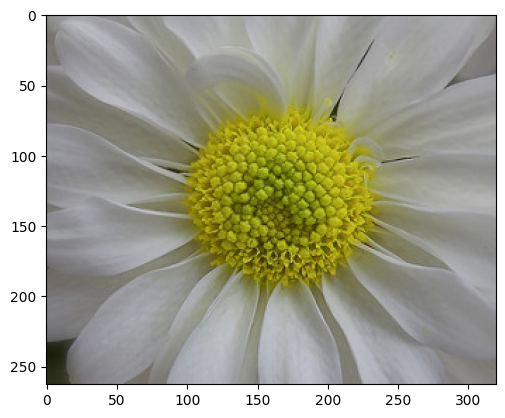

In [ ]:
img, label= dataset[0] #this is a pIL image
plt.imshow(img)

In [ ]:
import torchvision.transforms as tt #changing PIL image to tensor

dataset = ImageFolder(data_dir, tt.Compose([tt.Resize(64),
                                            tt.RandomCrop(64),
                                            tt.ToTensor()]))

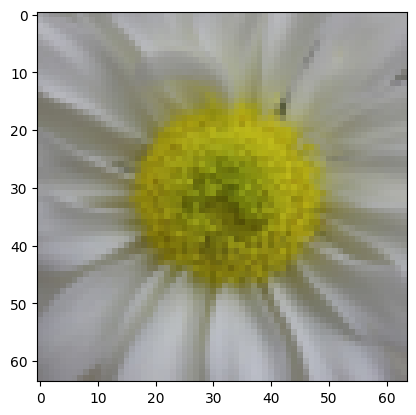

In [ ]:
img, label = dataset[0]
plt.imshow(img.permute((1, 2, 0)))

## 2. Splitting Data into Training and validation set

In [ ]:
val_pct = 0.1 #validation-percentage
val_size = int(val_pct * len(dataset)) #length of validation set
train_size = len(dataset) - val_size

train_size, val_size

(3886, 431)

In [ ]:
from torch.utils.data import random_split

train_ds, valid_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(valid_ds)

(3886, 431)

In [ ]:
#dataloaders -> used to efficiently load and process data in structured way under training or evaluation
from torch.utils.data import DataLoader

batch_size = 64 #manage data to groups of 64

train_dl = DataLoader(train_ds,
                      batch_size,
                      shuffle=True,
                      num_workers=4, #4 separate sub-process to load data
                      pin_memory=True)

valid_dl = DataLoader(valid_ds,
                    batch_size,
                    num_workers=4,
                    pin_memory=True)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

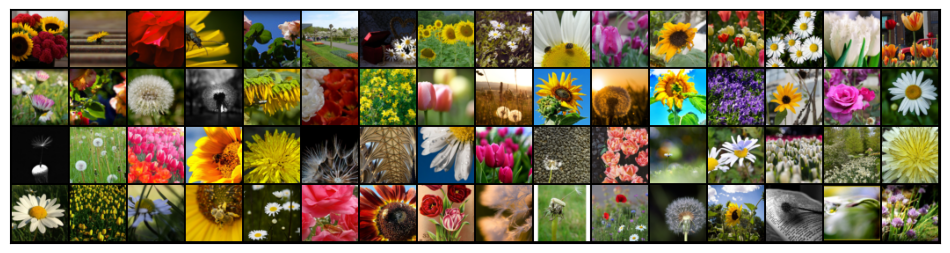

In [ ]:
show_batch(train_dl)

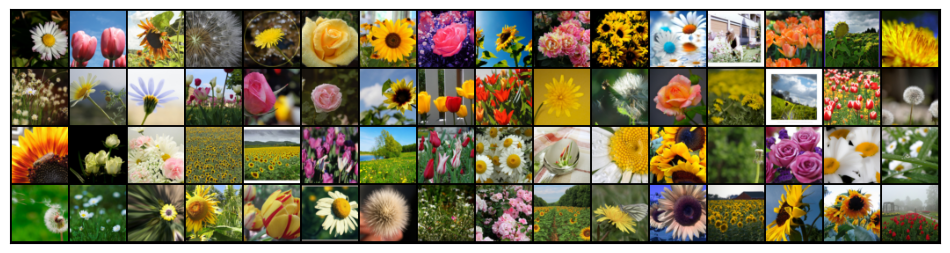

In [ ]:
show_batch(valid_dl)

##3. Utilitiy Functions and Classes



In [ ]:
import torch

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)


In [ ]:
torch.cuda.is_available()

True

In [ ]:
device=get_default_device()

In [ ]:
device #cuda-> lnaguage used to communicate with the gpu

device(type='cuda')

In [ ]:
imag,label=dataset[0]

In [ ]:
img

tensor([[[0.6392, 0.6078, 0.5843,  ..., 0.6588, 0.6549, 0.6549],
         [0.6745, 0.6392, 0.6275,  ..., 0.6510, 0.6588, 0.6627],
         [0.7176, 0.6902, 0.6510,  ..., 0.6549, 0.6588, 0.6627],
         ...,
         [0.5020, 0.5137, 0.5373,  ..., 0.5255, 0.5373, 0.5412],
         [0.4941, 0.5098, 0.5294,  ..., 0.5176, 0.5176, 0.5373],
         [0.4941, 0.5059, 0.5216,  ..., 0.5216, 0.5059, 0.5176]],

        [[0.6431, 0.6118, 0.5804,  ..., 0.6627, 0.6588, 0.6588],
         [0.6784, 0.6431, 0.6235,  ..., 0.6549, 0.6588, 0.6627],
         [0.7176, 0.6941, 0.6510,  ..., 0.6549, 0.6588, 0.6627],
         ...,
         [0.5020, 0.5098, 0.5333,  ..., 0.5216, 0.5333, 0.5373],
         [0.4902, 0.5098, 0.5255,  ..., 0.5098, 0.5098, 0.5333],
         [0.4863, 0.5020, 0.5176,  ..., 0.5176, 0.5020, 0.5059]],

        [[0.6588, 0.6275, 0.5922,  ..., 0.6706, 0.6667, 0.6667],
         [0.7020, 0.6627, 0.6431,  ..., 0.6627, 0.6667, 0.6745],
         [0.7451, 0.7137, 0.6745,  ..., 0.6627, 0.6706, 0.

In [ ]:
img.shape #3-> RGB and 224 -> resized height and width

torch.Size([3, 64, 64])

In [ ]:
img.device

device(type='cpu')

In [ ]:
img_gpu=to_device(img,device)
img_gpu.device

device(type='cuda', index=0)

In [ ]:
train_dl=DeviceDataLoader(train_dl,device)
valid_dl=DeviceDataLoader(valid_dl,device) #batches of image transferred to gpu

## 4. Model and Training Utilities

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        "calculate loss for a batch of training data"
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        #cross_entropy for single label classification problem
        return loss

    def validation_step(self, batch):
        "calculate loss & accuracy for a batch of validation data"
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
@torch.no_grad() #disables automatic gradient calculation
def evaluate(model, val_loader):
    """Evaluates the model's performance on the validation set"""
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward() #calculate gradient
            optimizer.step() #gradient descent and update weights of the model
            optimizer.zero_grad() #resets gradient
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

##5. Model Definition

Definiting ResNet9 Model (inspired by ResNet and consists of 9 main layers)

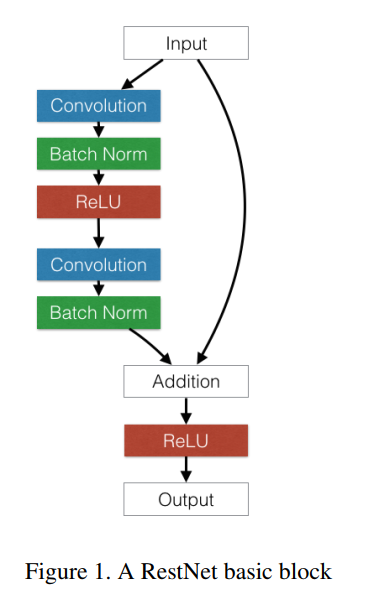

In [ ]:

def conv_block(in_channels, out_channels, pool=False): #create small CNN block
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), #edges, corners, textures
              nn.BatchNorm2d(out_channels), #normalizes to avoid overfitting
              nn.ReLU(inplace=True)] #activating function
    if pool: layers.append(nn.MaxPool2d(2)) #shrinks image
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase): #CNN, residual (skip) connections
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # Input: 64 x 3 x 64 x 64 (batch, channel(RGB), height, width)
        self.conv1 = conv_block(in_channels, 64) # 64 x 64 x 64 x 64
        self.conv2 = conv_block(64, 128, pool=True) # 64 x 128 x 32 x 32
        self.res1 = nn.Sequential(conv_block(128, 128),
                                  conv_block(128, 128)) #skip connection

        self.conv3 = conv_block(128, 256, pool=True) # 64 x 256 x 16 x 16
        self.conv4 = conv_block(256, 512, pool=True) # 64 x 512 x 8 x 8
        self.res2 = nn.Sequential(conv_block(512, 512),
                                  conv_block(512, 512)) #skip connection

        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # 64 x 512 x 1 x 1
                                        nn.Flatten(), # 64 x 512
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))

    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
model=to_device(ResNet9(3,len(dataset.classes)),device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
#weights inside first convulational layer
model.conv1[0].weight

Parameter containing:
tensor([[[[ 0.0227, -0.0719,  0.0596],
          [-0.1691,  0.0834,  0.0791],
          [-0.0020,  0.1171, -0.0054]],

         [[ 0.1401, -0.0995,  0.0626],
          [ 0.1259, -0.0821, -0.1709],
          [-0.0711, -0.0679, -0.1876]],

         [[ 0.0874, -0.0069, -0.1284],
          [-0.1250, -0.0805,  0.0622],
          [ 0.0812, -0.0344, -0.1460]]],


        [[[ 0.0737,  0.1877, -0.0122],
          [ 0.1615,  0.1386, -0.0641],
          [ 0.0836,  0.0902, -0.0906]],

         [[ 0.1617, -0.0296, -0.1790],
          [ 0.1760, -0.0430, -0.0777],
          [ 0.1619,  0.1241, -0.1102]],

         [[ 0.0596, -0.0508,  0.1318],
          [-0.0065, -0.0755, -0.0574],
          [ 0.1304, -0.1837, -0.0761]]],


        [[[-0.1080, -0.1718,  0.1577],
          [ 0.0718, -0.0140, -0.1080],
          [-0.0051, -0.0712,  0.1834]],

         [[ 0.1041,  0.0403, -0.0434],
          [ 0.1924,  0.0736, -0.0545],
          [ 0.0623,  0.1144,  0.0174]],

         [[ 0.0235, -0

In [ ]:
#testing the model for one batch of input tensors
torch.cuda.empty_cache()

for batch in train_dl:
    images, labels = batch
    print('images.shape', images.shape)
    print('images.device', images.device)
    preds=model(images)
    print('preds.shape:', preds.shape)
    break

images.shape torch.Size([64, 3, 64, 64])
images.device cuda:0
preds.shape: torch.Size([64, 5])


## 6. Training

In [ ]:
#starting point
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 1.6109673976898193, 'val_acc': 0.19942058622837067}]

In [52]:
history += fit(20, 0.001, model, train_dl, valid_dl, torch.optim.SGD)

Epoch [0], train_loss: 0.7230, val_loss: 0.7625, val_acc: 0.7253
Epoch [1], train_loss: 0.6969, val_loss: 0.7076, val_acc: 0.7618
Epoch [2], train_loss: 0.6902, val_loss: 0.6801, val_acc: 0.7604
Epoch [3], train_loss: 0.6733, val_loss: 0.7500, val_acc: 0.7395
Epoch [4], train_loss: 0.6427, val_loss: 0.7251, val_acc: 0.7409
Epoch [5], train_loss: 0.6338, val_loss: 0.6917, val_acc: 0.7612
Epoch [6], train_loss: 0.5986, val_loss: 0.6644, val_acc: 0.7955
Epoch [7], train_loss: 0.6156, val_loss: 0.7013, val_acc: 0.7553
Epoch [8], train_loss: 0.5890, val_loss: 0.8011, val_acc: 0.7097
Epoch [9], train_loss: 0.5521, val_loss: 0.6963, val_acc: 0.7515
Epoch [10], train_loss: 0.5532, val_loss: 0.6572, val_acc: 0.7880
Epoch [11], train_loss: 0.5321, val_loss: 0.7185, val_acc: 0.7685
Epoch [12], train_loss: 0.5229, val_loss: 0.6734, val_acc: 0.7718
Epoch [13], train_loss: 0.5035, val_loss: 0.6365, val_acc: 0.7784
Epoch [14], train_loss: 0.4946, val_loss: 0.7067, val_acc: 0.7604
Epoch [15], train_lo

## 7. Checking Accuracy and Loss

In [53]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

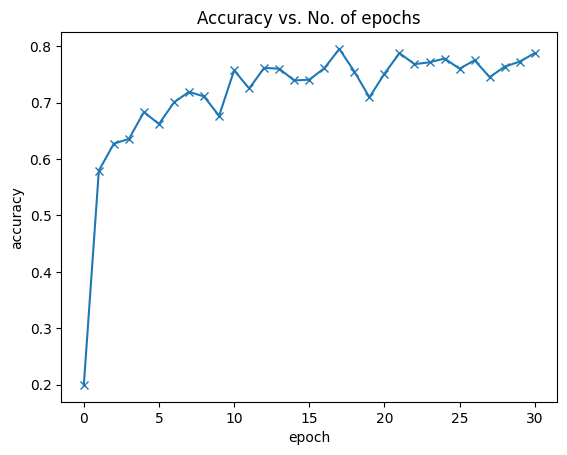

In [54]:
plot_accuracies(history)

In [55]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

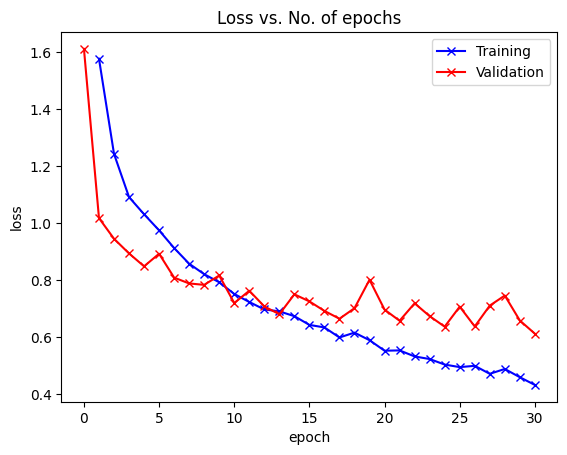

In [56]:
plot_losses(history)

### 7.1 Testing with individual images

In [57]:
def predict_image(img, model, classes):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

In [58]:
def show_image_prediction(img, label):
    plt.imshow(img.permute((1, 2, 0)))
    pred = predict_image(img, model, dataset.classes)
    print('Target:', dataset.classes[label])
    print('Prediction:', pred)

Target: tulip
Prediction: tulip


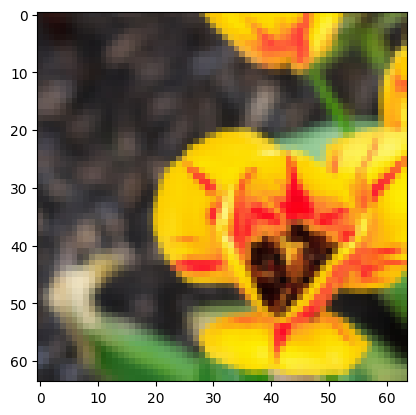

In [59]:
show_image_prediction(*valid_ds[100])

Target: rose
Prediction: dandelion


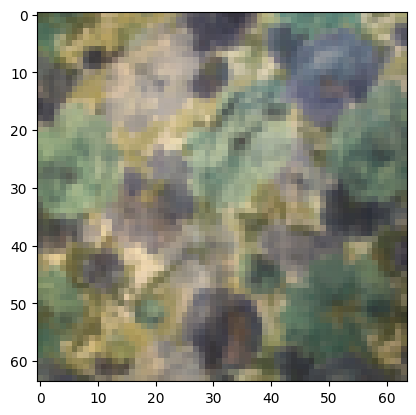

In [60]:
show_image_prediction(*valid_ds[300])

In [61]:
torch.save(model.state_dict(), 'flowers-resnet9.pth')